In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns    
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Super_Store.csv',sep=",",encoding='cp1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
data = df[['Order Date','Sales']].copy(deep=True)
data.head()

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840


In [7]:
data.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
data.duplicated().sum()

3

In [9]:
data = data.sort_values('Order Date')
data.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [10]:
data.tail()

,Order Date,Sales
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372
964,9/9/2017,14.136


In [13]:
data = data.groupby('Order Date')['Sales'].sum().reset_index()
data.head(10)

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940
5,1/11/2016,54.992
6,1/12/2017,37.680
7,1/13/2014,879.939
8,1/13/2015,542.450
9,1/13/2017,212.940


In [16]:
data['Order Date'].min(),data['Order Date'].max()

('1/1/2017', '9/9/2017')

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.head()

,Order Date,Sales
0,2017-01-01,975.490
1,2014-01-10,51.940
2,2015-01-10,1018.104
3,2016-01-10,104.770
4,2014-01-11,9.940


In [20]:
data = data.sort_values('Order Date')
data.head()

,Order Date,Sales
49,2014-01-06,2573.820
50,2014-01-07,76.728
1,2014-01-10,51.940
4,2014-01-11,9.940
7,2014-01-13,879.939


In [21]:
data.shape

(889, 2)

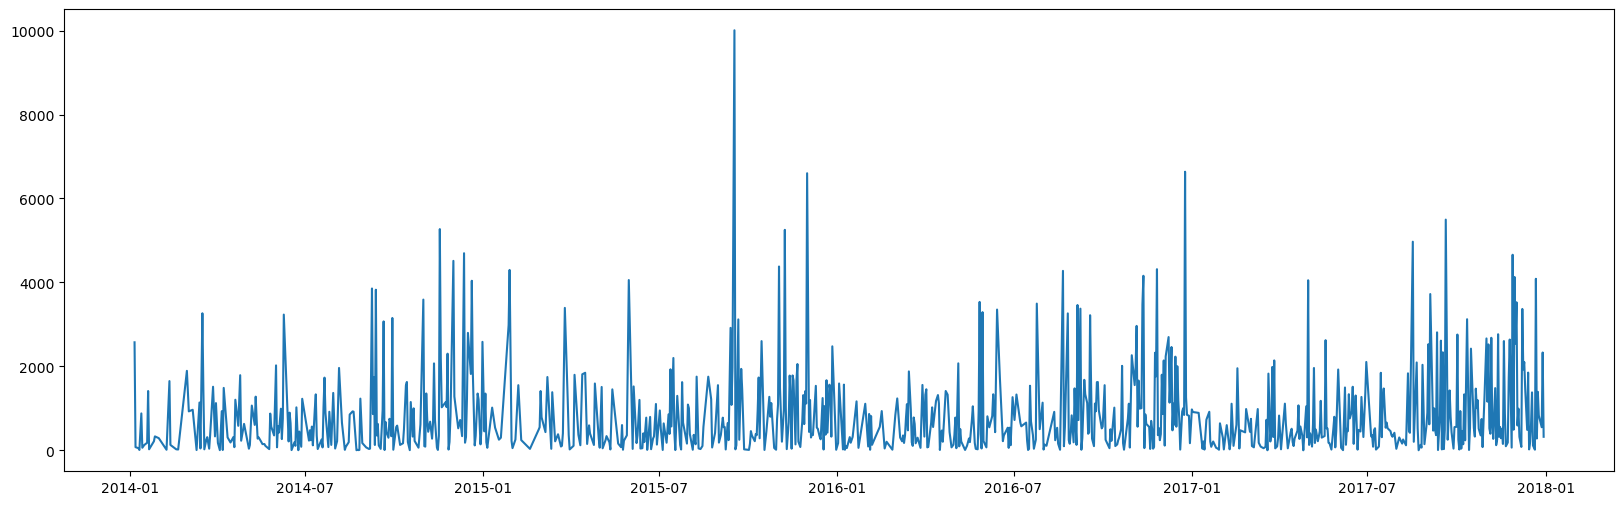

In [22]:
plt.figure(figsize=(20,6))
plt.plot(data['Order Date'],data['Sales'])
plt.show()

In [26]:
data.set_index('Order Date', inplace= True)
data.index
data.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [27]:
y_sum = data['Sales'].resample('MS').sum()
y_sum.head()

Order Date
2014-01-01     6242.525
2014-02-01     1839.658
2014-03-01    14573.956
2014-04-01     7944.837
2014-05-01     6912.787
Freq: MS, Name: Sales, dtype: float64

In [28]:
y_avg = data['Sales'].resample('MS').mean()
y_avg.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

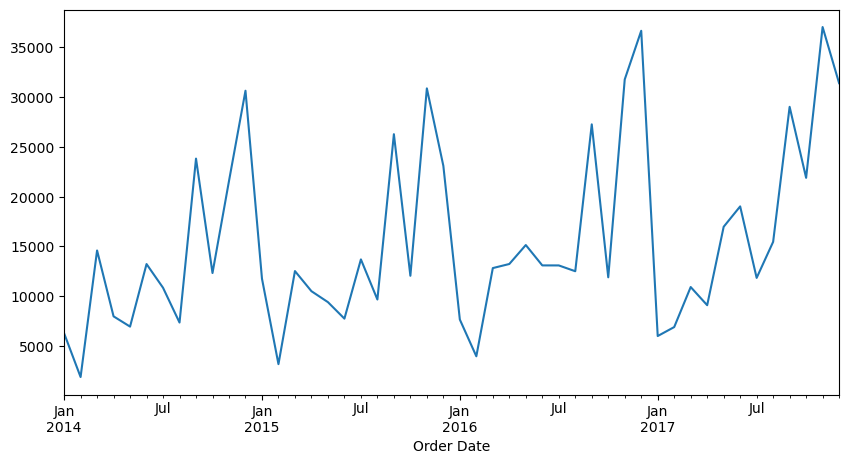

In [30]:
y_sum.plot(figsize=(10,5))
plt.show()

In [ ]:
y_avg.plt(figsize=(10,5))

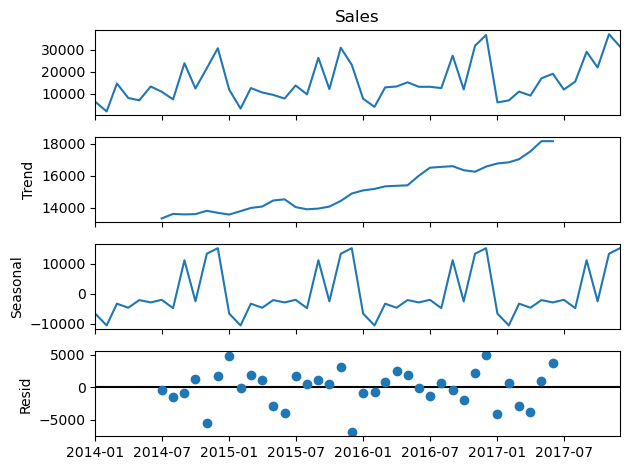

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y_sum)

decomposition.plot()
plt.show()

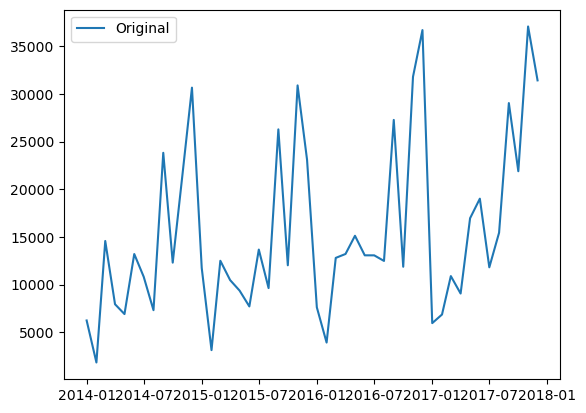

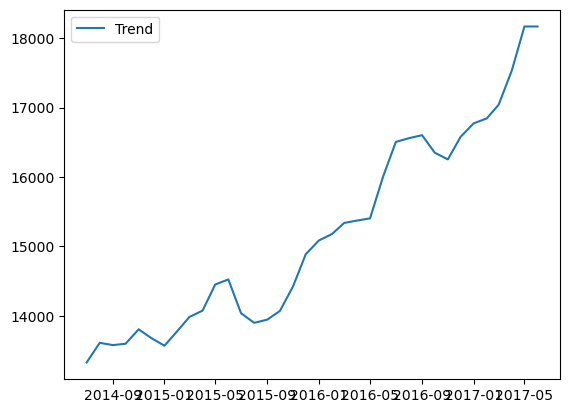

In [34]:
plt.plot(y_sum,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend()

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
result = adfuller(y_sum)
result

(-4.699026242828904,
 8.450793985809654e-05,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 781.9861669712573)

In [38]:
result[1]

8.450793985809654e-05

In [39]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(data['Sales'])
plt.show()

<Figure size 1200x600 with 0 Axes>

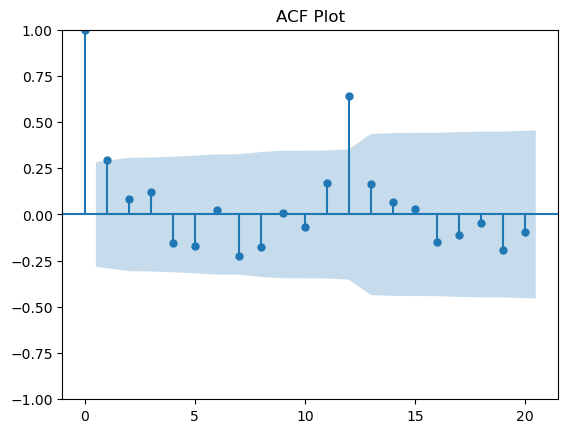

<Figure size 1200x600 with 0 Axes>

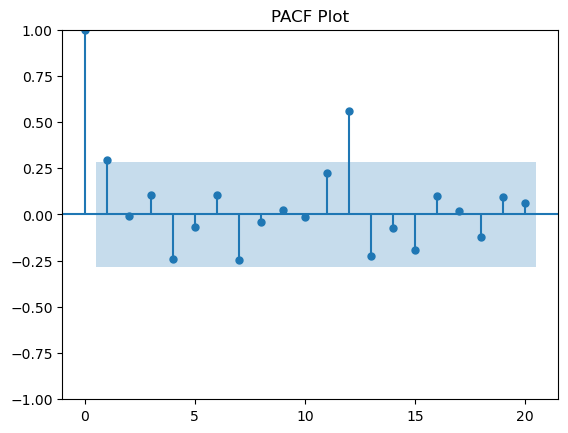

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#import matplotlib.pyplot as plt

#plot acf to determine q
plt.figure(figsize=(12,6))
plot_acf(y_sum,lags=20)
plt.title('ACF Plot')
plt.show()

#plot PACF to dertermine p
plt.figure(figsize=(12,6))
plot_pacf(y_sum,lags=20)
plt.title('PACF Plot')
plt.show()

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [65]:
model = ARIMA(y_sum, order=(2,2,2)) #order=(1,1,1) p,q,d values 
arima_model = model.fit()

In [66]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -487.416
Date:                Fri, 04 Oct 2024   AIC                            984.831
Time:                        16:23:50   BIC                            993.974
Sample:                    01-01-2014   HQIC                           988.256
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6653      0.815     -0.817      0.414      -2.262       0.931
ar.L2         -0.3749      0.272     -1.379      0.168      -0.908       0.158
ma.L1         -0.8221      1.015     -0.810      0.4

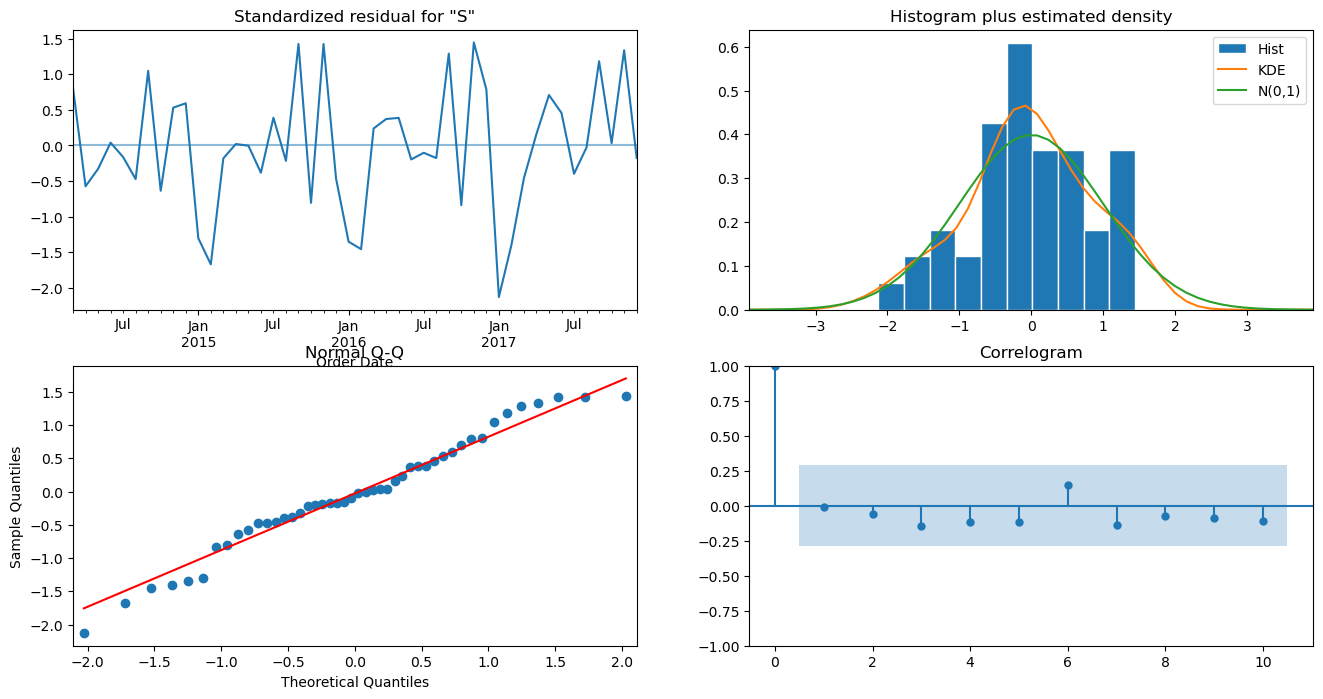

In [67]:
arima_model.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
residuale = pd.Dataframe(arima_model.resid)
residuals.plot(titile="Residuals", figsize)

In [72]:
forecast_steps = 12  # 24 for 2 years
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast

In [73]:
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
confidence_intervals, forecast_values

(             lower Sales   upper Sales
 2018-01-01   9378.973554  51824.961976
 2018-02-01  10764.438020  58561.940657
 2018-03-01   7558.292435  59783.584605
 2018-04-01   3924.756587  64507.525208
 2018-05-01   2675.875956  68590.077903
 2018-06-01    310.432079  71476.742583
 2018-07-01  -1896.543907  75089.812009
 2018-08-01  -3637.328137  78514.907769
 2018-09-01  -5620.262758  81665.344914
 2018-10-01  -7505.912172  84958.012428
 2018-11-01  -9285.668179  88179.186909
 2018-12-01 -11106.230743  91328.493119,
 2018-01-01    30601.967765
 2018-02-01    34663.189338
 2018-03-01    33670.938520
 2018-04-01    34216.140897
 2018-05-01    35632.976930
 2018-06-01    35893.587331
 2018-07-01    36596.634051
 2018-08-01    37438.789816
 2018-09-01    38022.541078
 2018-10-01    38726.050128
 2018-11-01    39446.759365
 2018-12-01    40111.131188
 Freq: MS, Name: predicted_mean, dtype: float64)

In [74]:
lower_limits = confidence_intervals.iloc[:,0]
upper_limits = confidence_intervals.iloc[:,1]

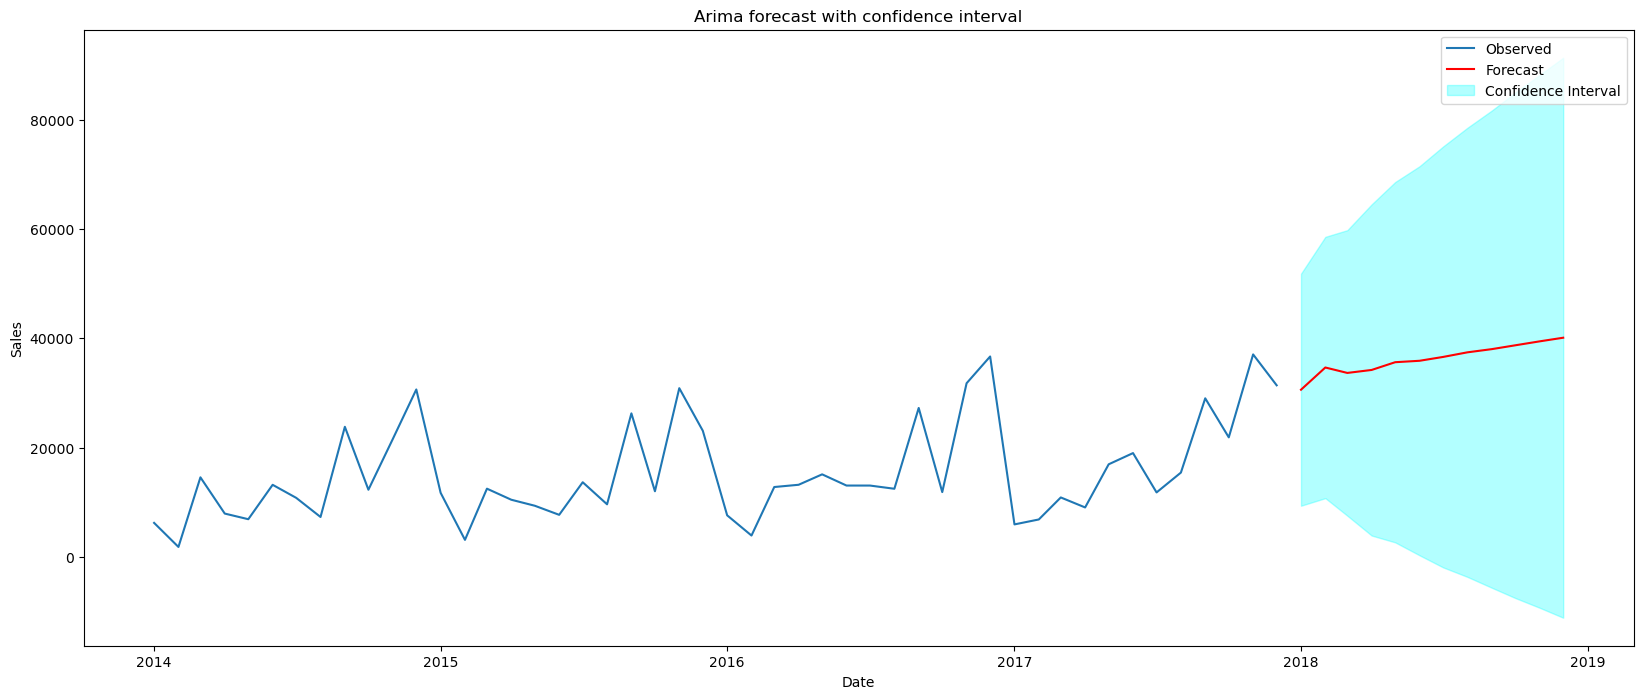

In [76]:
plt.figure(figsize=(20,8))
plt.plot(y_sum, label='Observed')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index, lower_limits, upper_limits, color='aqua', alpha=0.3, label='Confidence Interval')
plt.title('Arima forecast with confidence interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()